# Task 3: Predictive Analytics

## Polynomial Regression

## Import modules

In [2]:

import pandas as pd
import numpy as np
import re
import datetime as dt #for working with time objects

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# For working with regression
import sklearn
import warnings
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

# For evaluating regression algorithms
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For working with polynomial regression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split 



### Read in feature_set

In [4]:
feature_set = pd.read_pickle("feature_set.pkl")

In [5]:
feature_set.head(3)

,max_temp,precip,amount,day_of_week,hour_of_the_day,month
hour_from_zero,,,,,,
1,15.6,0,19,1,1,1
2,15.0,0,8,1,2,1
3,15.0,0,16,1,3,1


### Split into training and test set

In [18]:
X = feature_set.drop(columns = ["amount"])
y = feature_set["amount"]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8731 entries, 1 to 8759
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   max_temp         8731 non-null   float64
 1   precip           8731 non-null   int32  
 2   day_of_week      8731 non-null   int64  
 3   hour_of_the_day  8731 non-null   int64  
 4   month            8731 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 375.2 KB


In [15]:
# split the data with 70-30% split as above

x_train, x_test, y_train, y_test = train_test_split(feature_set.drop(columns = ["amount"]), feature_set["amount"], test_size=0.3,random_state=42)


#x_train, x_test, y_train, y_test = train_test_split(feature_set.drop(columns = ["amount"]), feature_set["amount"], test_size=0.3,random_state=42)

y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)


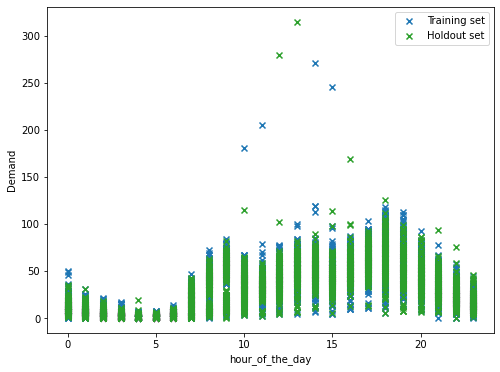

In [19]:
plt.figure(figsize = (8,6))
plt.scatter(x_train['hour_of_the_day'], y_train, marker='x', color="C0")
plt.scatter(x_test['hour_of_the_day'], y_test, marker='x', color="C2")
plt.xlabel("hour_of_the_day")
plt.ylabel("Demand")
plt.legend(['Training set', 'Holdout set'])
plt.show()

### Define multiple linear regression, fit polynomial to multiple regression

In [12]:
X = feature_set.drop(columns = ["amount"])
y = feature_set["amount"]

X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8731 entries, 1 to 8759
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   max_temp         8731 non-null   float64
 1   precip           8731 non-null   int32  
 2   day_of_week      8731 non-null   int64  
 3   hour_of_the_day  8731 non-null   int64  
 4   month            8731 non-null   int64  
dtypes: float64(1), int32(1), int64(3)
memory usage: 375.2 KB


In [20]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X)
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(0,24 ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("hour")
    plt.ylabel("amount")
    plt.xlim([0,24]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for the curve (degree = {}) is:'.format(d),r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

The R^2 for the curve (degree = 12) is: 0.6503725084622495


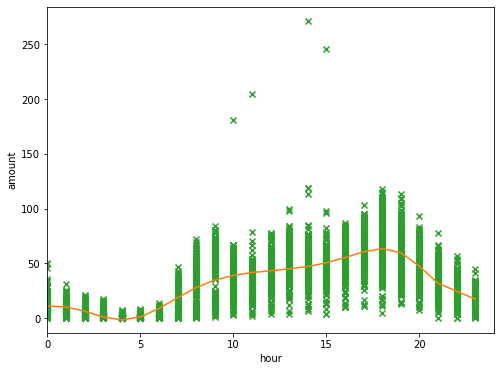

In [21]:
xt = pd.DataFrame(x_train['hour_of_the_day'])
plot_regression_poly_scikit(X = xt, Y = y_train, d = 12)

In [22]:
# initialize linear model
linear_model = LinearRegression(fit_intercept=True, normalize=False)
linear_model

LinearRegression()

In [23]:
# train model
linear_model.fit(X, y)
print(linear_model.coef_, linear_model.intercept_)

[  0.05733234 -10.27157632  -0.87370408   1.99827714   0.92392378] 3.8087037178612384


In [24]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures (degree = d)
    
    # Polynomial transformation
    x_poly = poly_reg.fit_transform(X)
    
    # Fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # Plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(0,24 ,1)[:, np.newaxis]
    y_pred = lin_reg_Poly.predict(poly_reg.fit_transform(x_fit.reshape(-1,1)))
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("hour")
    plt.ylabel("amount")
    plt.xlim([0,24]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for the curve (degree = {}) is:'.format(d),r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

In [25]:
# Fitting Polynomial Regression to Multiple Linear Regression

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression()

In [26]:
print(pol_reg.coef_, pol_reg.intercept_)

[ 0.00000000e+00 -1.79369031e-01 -6.15365331e+00  2.64217649e+00
  8.95585087e+00  4.85574470e-01  7.03584164e-02  9.61851463e-01
  3.32496466e-03 -7.26769500e-02 -2.41260885e-02 -6.15365331e+00
  4.62387049e-01 -7.19989951e-01 -4.80641423e-01 -4.57354873e-01
 -3.45194721e-02 -8.02714532e-02 -2.67498427e-01  7.48855559e-02
 -2.84819626e-02] -31.948224922848176


In [27]:
def ls_poly(X, y, d):
    
    # Create polynomial features
    min_X, max_X = X.min(), X.max()
    xs = 2*(X - min_X)/(max_X - min_X)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # Implement polynomial regression using least squares (we use the nomal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

In [28]:
# Splitting data

#define X and y vectors
xa = feature_set["hour_of_the_day"]
ya = feature_set["amount"]

# train-test split
X_train, X_test, y_train, y_test = train_test_split(xa, ya, test_size=0.3,random_state=42)

Text(0, 0.5, 'Mean squared error')

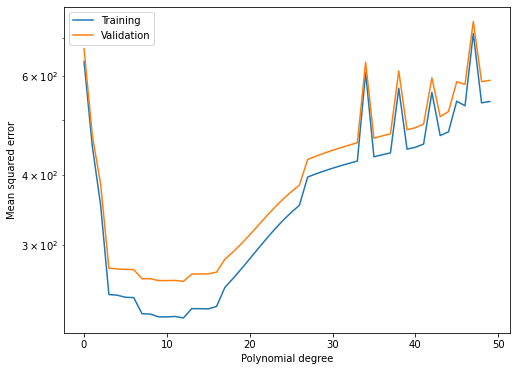

In [29]:
# Visualizing test and train set

# define loop 
err_train = []
err_test = []
for deg in range(50): # we want to loop across 0-50 degrees
    
    # create poly features
    poly_feat = PolynomialFeatures(degree=deg) #initialize
    
    X_train_poly=poly_feat.fit_transform(X_train.values.reshape((-1,1)))
    X_test_poly=poly_feat.fit_transform(X_test.values.reshape((-1,1)))
    
    # initialize and fit model
    lin_mod_poly = LinearRegression()
    lin_mod_poly.fit(X_train_poly,y_train)
    
    # compute errors and append to err_train and err_cv
    err_train.append(mean_squared_error(y_train,lin_mod_poly.predict(X_train_poly)))
    err_test.append(mean_squared_error(y_test,lin_mod_poly.predict(X_test_poly)))

# plot results
plt.figure(figsize = (8,6))    
plt.semilogy(range(50), err_train, range(50), err_test)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

In [30]:
# Split data into train, test and holdout set

# 70-30 split
X_train, X_test, y_train, y_test = train_test_split(xa, ya, test_size=0.3,random_state=34 )

# Split X_train to achive 50-20-30 split
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=34 )

In [31]:
print(len(X_train),len(X_hold),len(X_test))

4364 1747 2620


Text(0, 0.5, 'Mean squared error')

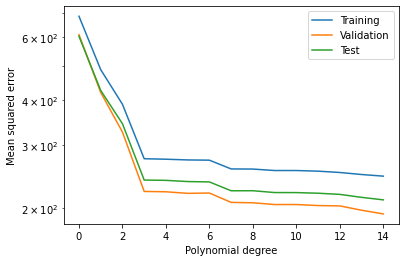

In [32]:
#Visualizing train, test and holdout sets

min_x_train, max_x_train = X_train.min(), X_train.max()
x_train = 2*(X_train - min_x_train)/(max_x_train - min_x_train) - 1
x_hold = 2*(X_hold - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(X_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    

err_train = []
err_hold = []
err_test = []
for i in range(15):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_hold.append(((poly_feat(x_hold,i) @ theta - y_hold)**2).mean())
    err_test.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())
plt.semilogy(range(15), err_train, range(15), err_hold,range(15), err_test)
plt.legend(["Training", "Validation", "Test"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

In [35]:
# Prediction 
y_true = feature_set["amount"]
y_pred = pol_reg.predict(poly_reg.fit_transform(X))

# Evaluation of algorithm

In [36]:
#(Root) Mean Squared Error ((R)MSE)
print("Mean Squared Error:",mean_squared_error(y_pred, y_true),"(Bike rentings)^2")
print("Root Mean Squared Error:",mean_squared_error(y_pred, y_true)**0.5,"Bike rentings")
print("Demand Mean:",feature_set["amount"].mean())

Mean Squared Error: 314.09993102678453 (Bike rentings)^2
Root Mean Squared Error: 17.722864639408172 Bike rentings
Demand Mean: 30.862215095636238


In [37]:
#Mean Absolute Error (MAE)
print("Mean Absolute Error:",mean_absolute_error(y_pred, y_true),"Bike rentings")

Mean Absolute Error: 13.767497148460926 Bike rentings


In [38]:
#Coefficient of Determination ( 𝑅2 )
print("Coefficient of determination:",r2_score(y_pred, y_true))

Coefficient of determination: 0.0547020436750677


### Predictions

In [39]:
# temp,precip,day of week, hour of the day, month

Xnew = np.array([[28,0,4,20,7]]) #predict peak demand at 28deg c, no rain, frieday, 8p.m., july
print("Exact prediction:", pol_reg.predict(poly_reg.fit_transform(Xnew))[0])
print("We probably should supply a minimum of",np.int_(pol_reg.predict(poly_reg.fit_transform(Xnew)))[0]+1, "Bikes, for our inserted parameters.")


Exact prediction: 55.98193071256127
We probably should supply a minimum of 56 Bikes, for our inserted parameters.


In [41]:
# temp,precip,day of week, hour of the day, month

Xnew = np.array([[30,0,4,13,6]]) #predict peak demand at 30deg c, no rain, frieday, 1p.m., june
print("Exact prediction:", pol_reg.predict(poly_reg.fit_transform(Xnew))[0])
print("We probably should supply a minimum of",np.int_(pol_reg.predict(poly_reg.fit_transform(Xnew)))[0]+1, "Bikes, for our inserted parameters.")


Exact prediction: 72.18306560082533
We probably should supply a minimum of 73 Bikes, for our inserted parameters.
